In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("bitcoin.csv")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#sb.set_style("whitegrid")
plt.style.use('seaborn-poster')
plt.rcParams["figure.figsize"] = (15,7)

from scipy import stats
import statsmodels.api as sm
from itertools import product
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

import pickle, joblib  
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("------------------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
def evals_():
    print("y_train / y_train_pred ")
    eval_metrics(y_train, y_train_pred)
    #print("y_test / y_test_pred ")
    #eval_metrics(y_test, y_test_pred)
def rms_() :   #  RMS
    trainscore = int(math.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("Train Score: %.f RMSE" % (trainscore))
    #testscore = int(math.sqrt(mean_squared_error(y_test, y_test_pred)))
    #print("Test Score: %.f RMSE" % (testscore))


# Visualising the results
def ploty(real,predicted)  :
    plt.plot(real,      color = 'red' , label = '  Real Price'     )   # Real Stock price
    plt.plot(predicted, color = 'blue', label = '  Predicted Price')
    plt.xlabel('Day') ; plt.ylabel(' Price') ; plt.legend()
    plt.show()
def plot_():
    #ploty(y_train,y_train_pred)    # TRAIN
    ploty(y_test,y_test_pred)       # TEST

In [5]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.index = df.Timestamp
df_day= df.resample('D').mean()

In [10]:
df_day.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [11]:
df_day.isnull().sum().sum()

21

In [12]:
df_day = df_day.iloc[1200:,:]

In [13]:
df_day.isnull().sum().sum()


0

In [14]:
df.dropna(inplace=True)

In [15]:
# Resampling to monthly frequency
df_month = df_day.resample('M').mean()

# Resampling to quarterly frequency
df_Q = df_day.resample('Q-DEC').mean()

# Resampling to annual frequency
df_year = df_day.resample('A-DEC').mean()

In [16]:
df_day.tail(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-27,55193.240643,55219.665031,55168.757372,55195.415367,1.823877,100884.732367,55193.357260
2021-03-28,55833.608471,55857.735342,55810.425126,55835.012863,1.447939,80632.115263,55832.958824
2021-03-29,56914.886595,56946.213593,56885.242967,56915.629993,3.732887,213754.555988,56913.993819
2021-03-30,58347.805624,58371.955310,58323.956690,58349.357087,2.363999,138231.241926,58346.912268
2021-03-31,58767.750000,58778.180000,58755.970000,58778.180000,2.712831,159417.751000,58764.349363


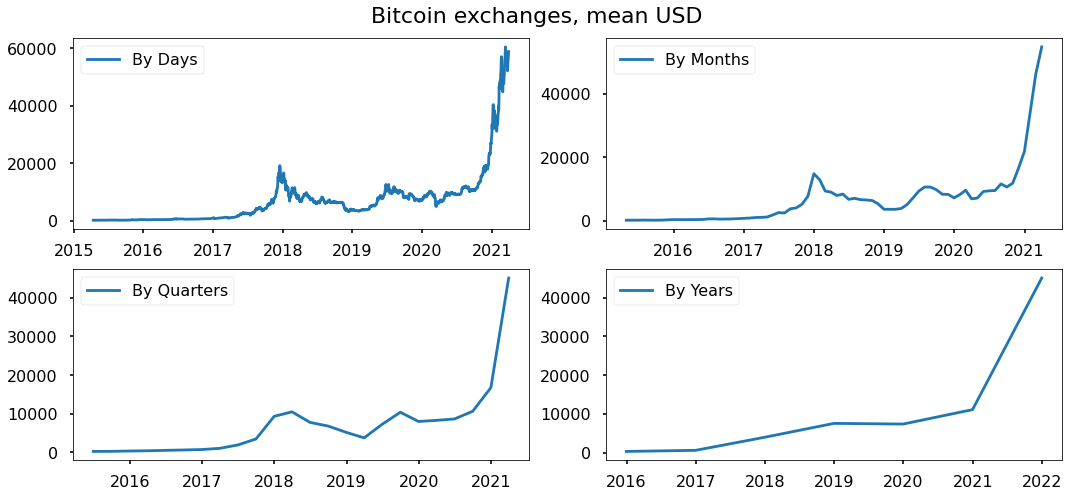

In [17]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)
plt.subplot(221)
plt.plot(df_day.Weighted_Price, '-', label='By Days')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1080x504 with 0 Axes>

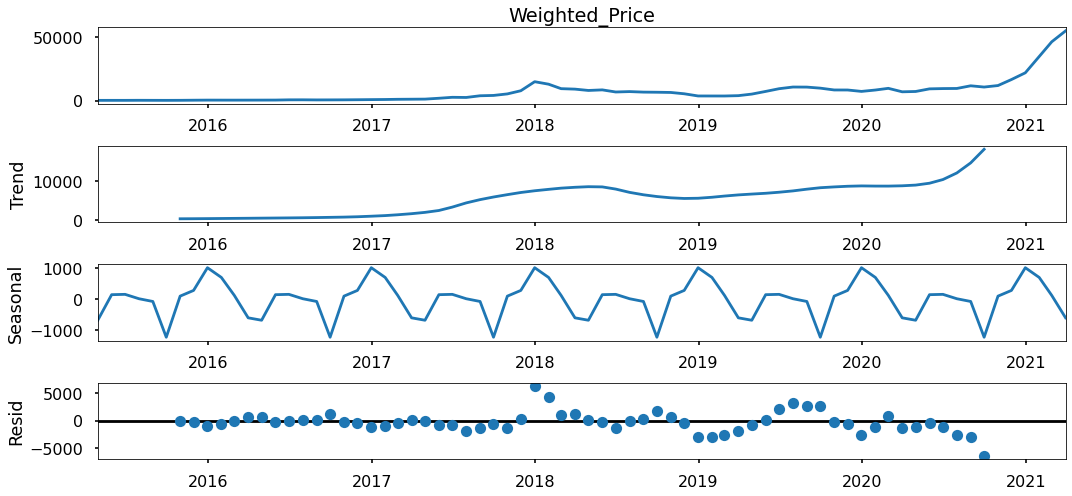

In [18]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
plt.show()

In [19]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

Dickey–Fuller test: p=0.997745


In [20]:
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)

In [21]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price_box)[1])

Dickey–Fuller test: p=0.950513


In [22]:
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.498606


In [25]:
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
df_month.head(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,prices_box_diff,prices_box_diff2
Timestamp,,,,,,,,,,
2015-04-30,225.854419,225.934278,225.774319,225.851627,8.095276,1828.627171,225.849341,8.051029,NaN,NaN
2015-05-31,236.624402,236.700333,236.539994,236.617998,6.600567,1562.256942,236.614386,8.149463,NaN,NaN
2015-06-30,236.944047,237.004571,236.870755,236.938494,7.233212,1727.423002,236.937207,8.152355,NaN,NaN
2015-07-31,279.362152,279.441892,279.278269,279.362182,12.595982,3533.544693,279.357535,8.505691,NaN,NaN
2015-08-31,252.553623,252.630323,252.463491,252.547605,13.644315,3311.390346,252.542459,8.288247,NaN,NaN


<Figure size 1080x504 with 0 Axes>

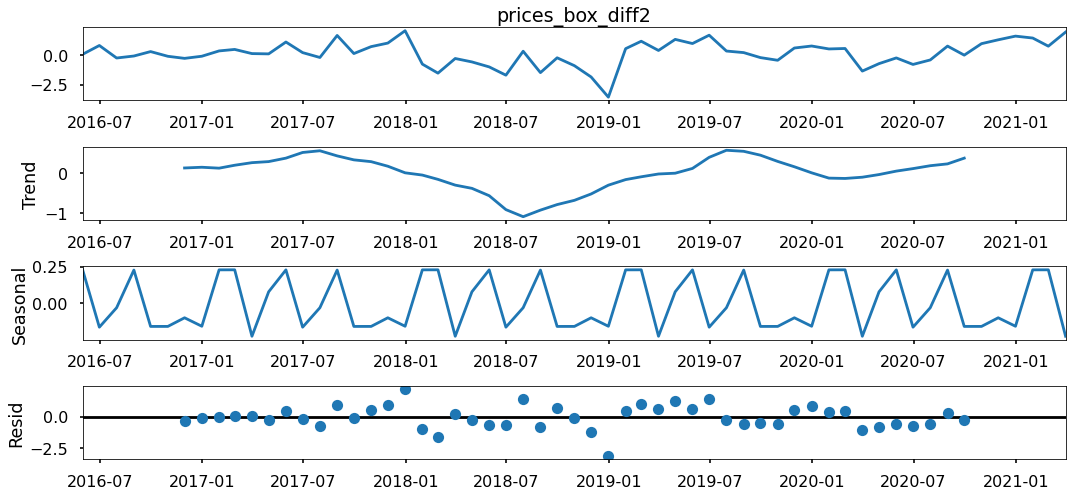

In [26]:
plt.figure(figsize=(15,7))
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
plt.show()

In [27]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

Dickey–Fuller test: p=0.000193


In [29]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
              seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


In [30]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  137.728554
22  (1, 0, 2, 0)  137.865938
25  (1, 1, 0, 1)  139.017470
28  (1, 1, 2, 0)  139.367369
37  (2, 0, 0, 1)  139.383490
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                   72
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -65.864
Date:                              Mon, 10 Jan 2022   AIC                            137.729
Time:                                      20:02:44   BIC                            143.961
Sample:                                  04-30-2015   HQIC                           140.162
                                       - 03-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


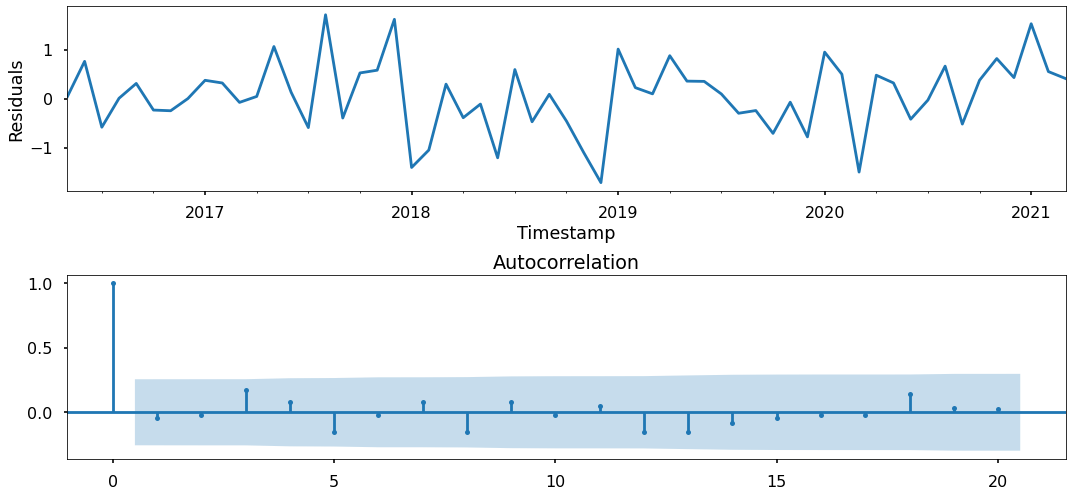

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=20, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

In [32]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

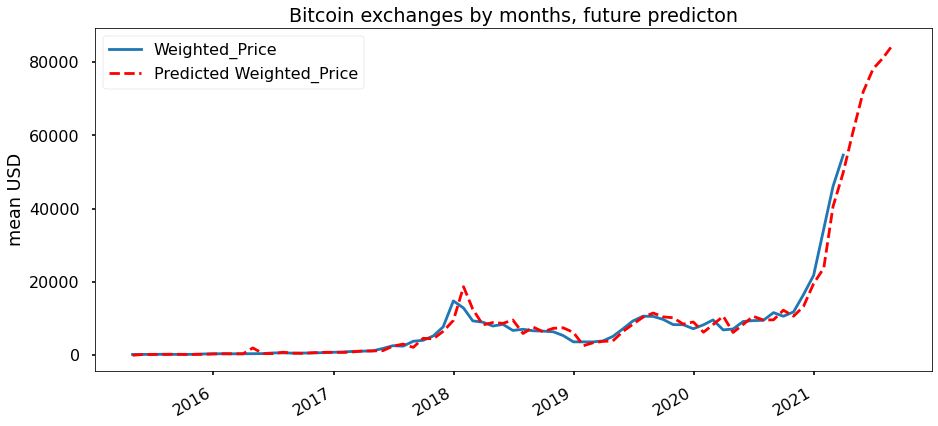

In [33]:
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2021, 3, 31), datetime(2021, 4, 30), datetime(2021, 5, 31), datetime(2021, 6, 30), 
             datetime(2021,7, 31), datetime(2021, 8, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=76), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges by months, future predicton')
plt.ylabel('mean USD')
plt.show()


In [34]:
df_month2.forecast.tail(8)

2021-02-28    40587.027527
2021-03-31    49850.636832
2021-03-31    49850.636832
2021-04-30    61053.870769
2021-05-31    71935.590278
2021-06-30    78169.237355
2021-07-31    81228.992042
2021-08-31    85037.856117
Name: forecast, dtype: float64

In [35]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [36]:
end_=len(df_day)
end_

2179

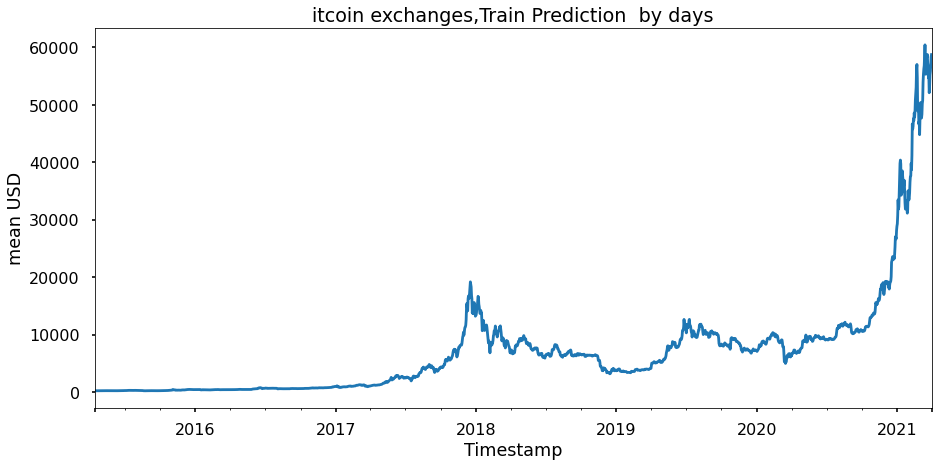

,Weighted_Price,forecast
Timestamp,,
2015-04-14,218.914650,NaN
2015-04-15,220.101892,NaN
2015-04-16,226.506821,NaN
2015-04-17,223.853119,NaN
2015-04-18,222.736549,NaN
...,...,...
2021-03-27,55193.357260,NaN
2021-03-28,55832.958824,NaN
2021-03-29,56913.993819,NaN


In [41]:
df2 = df_day[['Weighted_Price']]
df2['forecast'] = invboxcox(best_model.predict(start=8, end=end_), lmbda)
plt.figure(figsize=(15,7))
df2.Weighted_Price.plot()
df2.forecast.plot(color='g', ls='-', label='Predicted Weighted_Price')
plt.title("Bitcoin exchanges,Train Prediction  by days")
plt.ylabel('mean USD')
plt.show()
df2

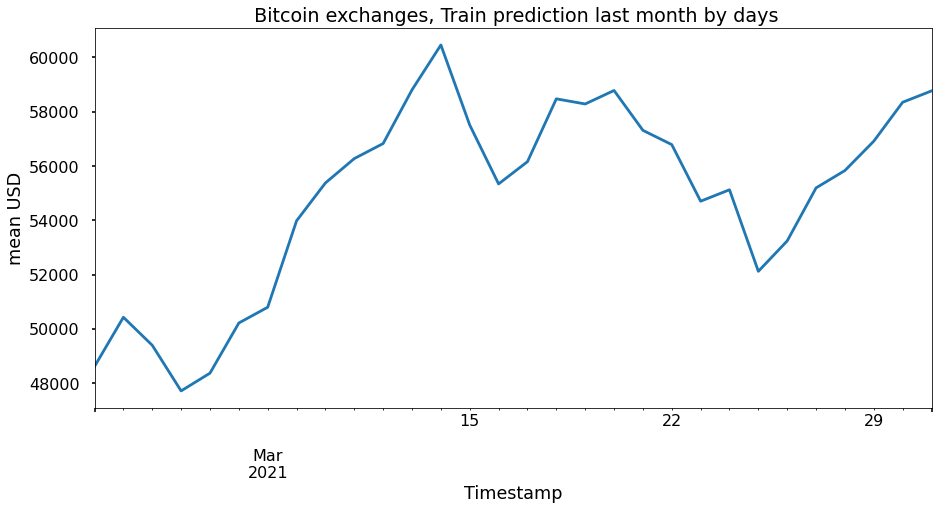

In [42]:
df3= df_day[['Weighted_Price']][-30:]
df3['forecast'] = invboxcox(best_model.predict(start=end_-30, end=end_), lmbda)
plt.figure(figsize=(15,7))
df3.Weighted_Price.plot()
df3.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.title(' Bitcoin exchanges, Train prediction last month by days')
plt.ylabel('mean USD')
plt.show()